# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [3]:
df = pd.read_csv('../data/states_edu.csv')
# df_ categorizes items by State
df_=df.set_index('STATE')

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [48]:
#renamed columns for df_
df_.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_CB'
    },
    axis=1,inplace=True)
df_.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df_["ENROLL_ALL"].isna().sum()
(df_["ENROLL_ALL"]-df_["ENROLL_PREK"]-df_["ENROLL_KINDER"]-df_["ENROLL_PRIMARY"]-df_["ENROLL_HS"]).describe()
df_["ENROLL_ALL_CB"] = df_["ENROLL_ALL_CB"].fillna(df_["ENROLL_ALL"])
df_.dropna()

,PRIMARY_KEY,YEAR,ENROLL_ALL_CB,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
ALABAMA,2003_ALABAMA,2003,727900.0,5196054.0,567704.0,2966981.0,1661369.0,5298932.0,2817111.0,1521462.0,...,57323.0,59663.0,42005.0,466920.0,205907.0,731220.0,223.0,262.0,207.0,253.0
ALASKA,2003_ALASKA,2003,133303.0,1425948.0,259423.0,813371.0,353154.0,1610289.0,763525.0,514052.0,...,10115.0,11140.0,8651.0,82337.0,40238.0,133933.0,233.0,279.0,212.0,256.0
ARIZONA,2003_ARIZONA,2003,875111.0,6529894.0,740579.0,2912629.0,2876686.0,6210287.0,2810907.0,1964229.0,...,76207.0,76376.0,68815.0,613442.0,307272.0,1012068.0,229.0,271.0,209.0,255.0
ARKANSAS,2003_ARKANSAS,2003,450158.0,3241275.0,379947.0,2394336.0,466992.0,3242799.0,1768713.0,972598.0,...,34070.0,37004.0,28840.0,281834.0,132712.0,454523.0,229.0,266.0,214.0,258.0
CALIFORNIA,2003_CALIFORNIA,2003,6226552.0,59815855.0,5795655.0,33617766.0,20402434.0,59749885.0,29561563.0,17030335.0,...,493415.0,500143.0,395194.0,3929869.0,1854518.0,6413867.0,227.0,267.0,206.0,251.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIRGINIA,2015_VIRGINIA,2015,1279867.0,15857524.0,1012205.0,6240349.0,8604970.0,16113212.0,8755896.0,5075509.0,...,96851.0,95221.0,90391.0,772414.0,386781.0,1283590.0,247.0,288.0,229.0,267.0
WASHINGTON,2015_WASHINGTON,2015,1072359.0,13709442.0,1036422.0,8293812.0,4379208.0,13630138.0,6508964.0,4510672.0,...,82404.0,79483.0,89258.0,656797.0,336808.0,1087030.0,245.0,287.0,226.0,267.0
WEST_VIRGINIA,2015_WEST_VIRGINIA,2015,279565.0,3478401.0,362959.0,1979466.0,1135976.0,3466981.0,1819903.0,1161944.0,...,19814.0,20426.0,18432.0,162070.0,80142.0,277452.0,235.0,271.0,216.0,260.0


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: GRADE 8 MATH

How many years of data are logged in our dataset? 

In [36]:
print(df_["YEAR"].unique())
print(df_["YEAR"].nunique())

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [37]:
#wasn't able to pull up both MI and OH avg_math_8_score simultaneously, so ran each code individually to get result
df_.loc["MICHIGAN",["AVG_MATH_8_SCORE"]].mean() #MI 276.1667
df_.loc["OHIO",["AVG_MATH_8_SCORE"]].mean() #OH 282.23


AVG_MATH_8_SCORE    282.25
dtype: float64

Find the average for your outcome score across all states in 2019

In [38]:
#Was only able to produce outcome score across states in only 2019
df_.groupby('YEAR')["AVG_MATH_8_SCORE"].mean()

#avg_math_8_score_2019 = 281.264

YEAR
1990    263.000000
1992    266.325581
1996    270.000000
2000    271.404762
2003    276.943396
2005    277.867925
2007    280.773585
2009    282.509434
2011    283.584906
2013    284.113208
2015    281.905660
2017    282.113208
2019    281.264151
Name: AVG_MATH_8_SCORE, dtype: float64

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [39]:
df_.groupby("STATE")["AVG_MATH_8_SCORE"].max()

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

<AxesSubplot:title={'center':'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

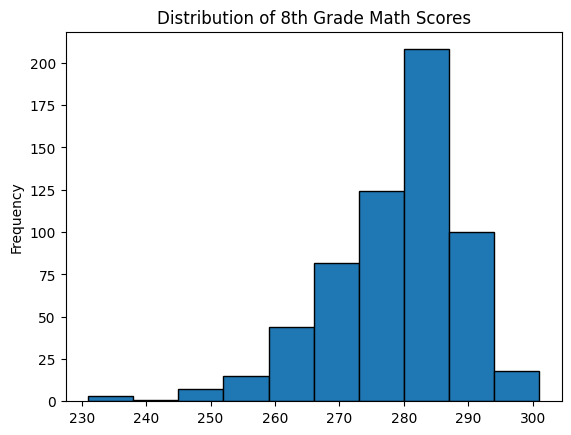

In [9]:
df_.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")


Text(0.5, 1.0, '8th Grade Math Score Over Time')

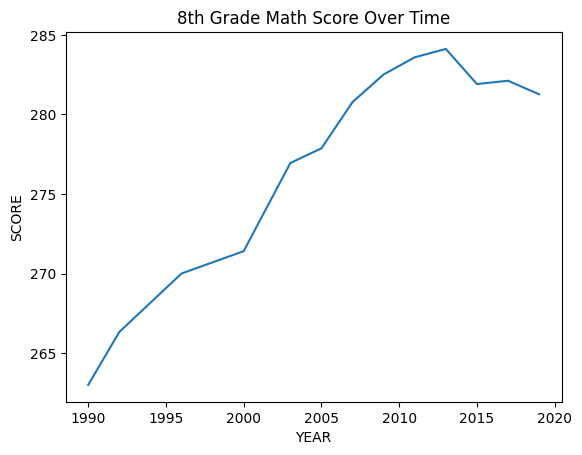

In [10]:
df_.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

Feature engineering justification: I did not modify/create a feature; I used used this space to look at the AVG_MATH_8_SCORE in isolation

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

Text(0, 0.5, '8th Grade Math Score')

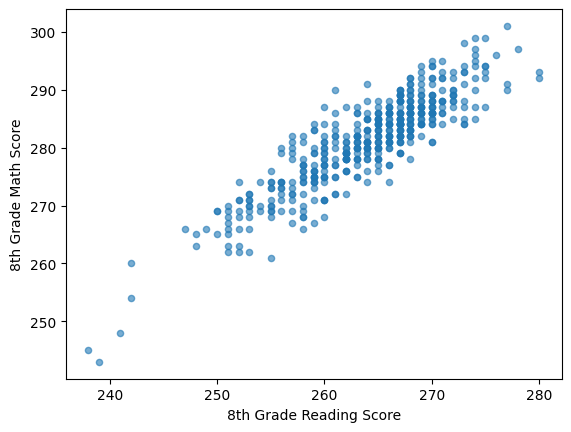

In [11]:
df_.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

There is a strong, positive correlation between 8th Grade Reading and Math Scores. 

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

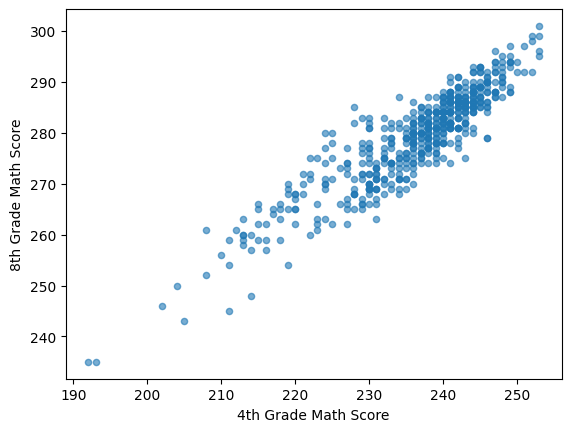

In [12]:
df_.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

There is a strong positive correlation with 8th Grade Math Score and 4th Grade Math Score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [13]:
from sklearn.model_selection import train_test_split

In [54]:
#input datea: ENROLL_8, AVG_MATH_4_SCORE, AVG_READING_8_SCORE
#output data: AVG_MATH_8_SCORE
X = df_[['ENROLL_8','AVG_MATH_4_SCORE','AVG_READING_8_SCORE']].dropna()
y = df_.loc[X.index]['AVG_MATH_8_SCORE']

In [55]:
#fill in NaN w median of Y
y.fillna(y.mean(), inplace=True)


In [104]:
#print (X) and print(y)
#df_[['ENROLL_8' , 'AVG_MATH_4_SCORE' , 'AVG_READING_8_SCORE' , 'AVG_MATH_8_SCORE']]
df_.describe()

,YEAR,ENROLL_ALL_CB,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,602.000000,5.280000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,4.390000e+02,3.970000e+02,...,528.000000,528.000000,528.000000,3.970000e+02,4.480000e+02,5.280000e+02,564.000000,602.000000,521.000000,478.000000
mean,2007.490033,9.449153e+05,1.023135e+07,9.121775e+05,4.724386e+06,4.594788e+06,1.034093e+07,5.352896e+06,3.020171e+06,4.880250e+05,...,72539.367424,72077.121212,63550.556818,5.817467e+05,2.881217e+05,9.627404e+05,236.336879,278.280731,219.796545,263.870293
std,8.491205,1.101930e+06,1.286685e+07,1.298211e+06,6.050895e+06,5.993186e+06,1.311452e+07,6.887246e+06,3.660872e+06,5.875366e+05,...,84642.611500,83403.141836,74845.757387,6.861806e+05,3.412013e+05,1.122318e+06,9.291031,10.343482,6.962321,6.513002
min,1990.000000,4.417900e+04,5.594810e+05,3.102000e+04,0.000000e+00,2.209300e+04,5.537320e+05,3.150090e+05,1.523400e+05,2.310700e+04,...,4643.000000,3371.000000,2785.000000,3.769800e+04,1.378100e+04,6.892500e+04,192.000000,231.000000,188.000000,238.000000
25%,2003.000000,2.781248e+05,2.600477e+06,2.356470e+05,1.340360e+06,8.724675e+05,2.519543e+06,1.355797e+06,7.694675e+05,1.289410e+05,...,20509.250000,20752.000000,18481.500000,1.656130e+05,8.141525e+04,2.809350e+05,232.000000,272.000000,216.000000,260.000000
50%,2009.000000,6.659445e+05,5.732319e+06,5.290370e+05,2.908595e+06,2.334041e+06,5.796945e+06,2.982862e+06,1.731328e+06,3.382670e+05,...,50972.500000,49819.000000,40864.500000,4.050170e+05,1.876495e+05,6.774000e+05,238.000000,280.500000,221.000000,265.000000
75%,2015.000000,1.037675e+06,1.166963e+07,1.009335e+06,5.886130e+06,5.230560e+06,1.141156e+07,5.995174e+06,3.484399e+06,5.669330e+05,...,82444.500000,81453.500000,75882.750000,6.458510e+05,3.293510e+05,1.086911e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.236047e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.011865e+06,6.437202e+06,253.000000,301.000000,237.000000,280.000000


In [53]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
#lmao idk what I wrong ope
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [602, 6878]

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [ ]:
# create your model here
# model = 
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR'

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**